© 2025 WaLSA Team - Shahin Jafarzadeh et al.

This notebook is part of the [WaLSAtools](https://github.com/WaLSAteam/WaLSAtools) package (v1.0.0), provided under the [Apache License, Version 2.0](http://www.apache.org/licenses/LICENSE-2.0).

You may use, modify, and distribute this notebook and its contents under the terms of the license.

---

**Important Note on Figures**:
Figures generated using this notebook that are **identical to or derivative of those published in**:  
**Jafarzadeh, S., Jess, D. B., Stangalini, M. et al. 2025, Nature Reviews Methods Primers, in press**,  
are copyrighted by ***Nature Reviews Methods Primers***. Any reuse of such figures requires explicit permission from the journal.

Figures that are newly created, modified, or unrelated to the published article may be used under the terms of the Apache License.

---

**Disclaimer**:
This notebook and its code are provided "as is", without warranty of any kind, express or implied. Refer to the license for more details.

In [1]:
from astropy.io import fits # type: ignore
from WaLSAtools import WaLSAtools, WaLSA_save_pdf # type: ignore

# Load the synthetic data
data_dir = 'Synthetic_Data/'
hdul = fits.open(data_dir + 'NRMP_signal_1D.fits')
signal = hdul[0].data  # 1D synthetic signal data
time = hdul[1].data  # Time array in the second HDU (Extension HDU 1)
hdul.close()

# EMD & HHT Calculations using WaLSAtools
HHT_power_spectrum, HHT_significance_level, HHT_freq_bins, psd_spectra_fft, confidence_levels_fft, imfs, IMF_significance_levels, instantaneous_frequencies = WaLSAtools(
    signal = signal, 
    time = time,
    method = 'emd', 
    siglevel = 0.95,
    EEMD = True
)

Detrending and apodization complete.
EEMD processed.


GPL Ghostscript 10.04.0 (2024-09-18)
Copyright (C) 2024 Artifex Software, Inc.  All rights reserved.
This software is supplied under the GNU AGPLv3 and comes with NO WARRANTY:
see the file COPYING for details.
Processing pages 1 through 1.
Page 1
PDF saved in CMYK format as 'Figures/FigS3_EEMD_analysis.pdf'


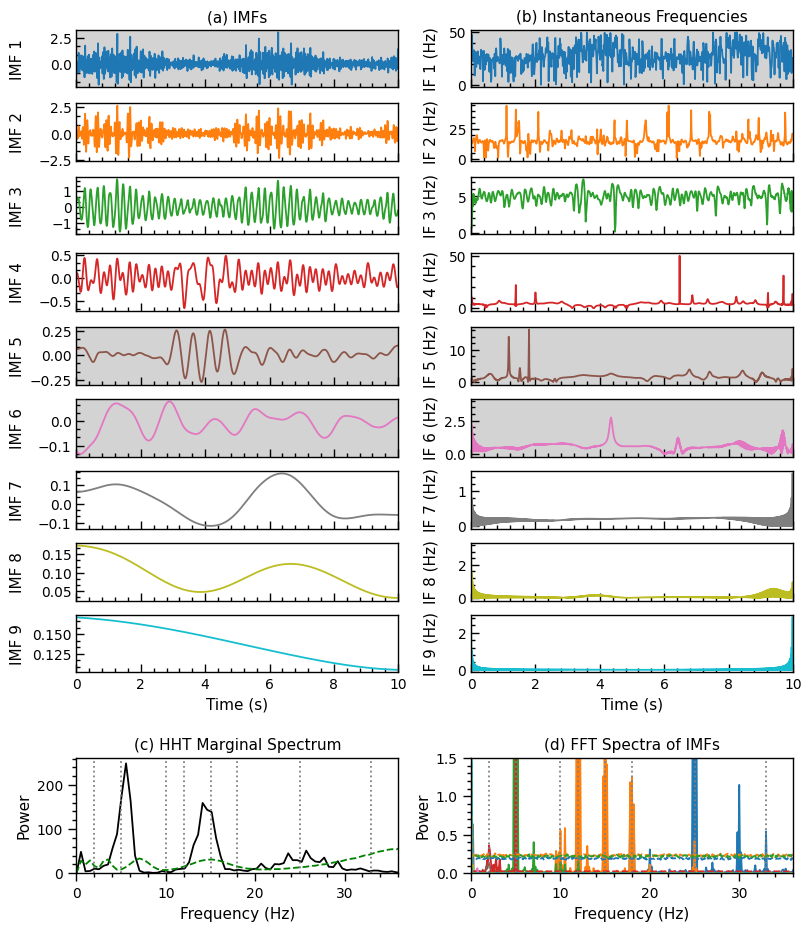

In [2]:
import numpy as np # type: ignore
import matplotlib.pyplot as plt # type: ignore
from matplotlib.ticker import AutoMinorLocator # type: ignore
import matplotlib.gridspec as gridspec # type: ignore

def custom_round(freq):
    if freq < 1:
        return round(freq, 1)
    else:
        return round(freq)

# Setting global parameters
plt.rcParams.update({
    'font.size': 12,          # Global font size
    'axes.titlesize': 11,     # Title font size
    'axes.labelsize': 11,     # Axis label font size
    'xtick.labelsize': 10,    # X-axis tick label font size
    'ytick.labelsize': 10,    # Y-axis tick label font size
    'legend.fontsize': 12,    # Legend font size
    'figure.titlesize': 12.5,   # Figure title font size
    'axes.grid': False,        # Turn on grid by default
    'grid.alpha': 0.5,        # Grid transparency
    'grid.linestyle': '--',   # Grid line style
})

significance_threshold=0.05

plt.rc('axes', linewidth=1.0)
plt.rc('lines', linewidth=1.3)

# Color cycle for consistency across plots
colors = plt.cm.tab10(np.linspace(0, 1, len(imfs)))

# Create a multi-panel plot with custom grid layout
fig = plt.figure(figsize=(8., 9.2), constrained_layout=True)
gs = gridspec.GridSpec(len(imfs) + 2, 2, height_ratios=[1]*len(imfs) + [0.3, 2], figure=fig)

# Plot each IMF and its instantaneous frequency side by side
for i, (imf, freq) in enumerate(zip(imfs, instantaneous_frequencies)):
    ax_imf = fig.add_subplot(gs[i, 0])
    ax_if = fig.add_subplot(gs[i, 1])
    
    if IMF_significance_levels[i] > significance_threshold:
        ax_imf.set_facecolor('lightgray')
    ax_imf.plot(time, imf, label=f'IMF {i+1}', color=colors[i])
    ax_imf.set_ylabel(f'IMF {i+1}')
    ax_imf.yaxis.set_label_coords(-0.16, 0.5)  # Align y-axis labels
    ax_imf.xaxis.set_minor_locator(AutoMinorLocator(5))
    ax_imf.yaxis.set_minor_locator(AutoMinorLocator(3))
    ax_imf.tick_params(axis='both', which='major', direction='in', length=6, width=1.0)
    ax_imf.tick_params(axis='both', which='minor', direction='in', length=3, width=1.0)
    if i < len(imfs) - 1:
        ax_imf.set_xticklabels([])  # Hide x labels for all but the last IMF plot
    if i == 0:
        ax_imf.set_title('(a) IMFs')
        ax_imf.tick_params(axis='x', which='both', top=False)  # Turn off upper x-axis ticks
    ax_imf.set_xlim(0, 10)
    if i == len(imfs) - 1:
        ax_imf.set_xlabel('Time (s)')

    if IMF_significance_levels[i] > significance_threshold:
        ax_if.set_facecolor('lightgray')
    if len(freq) < len(time):
        freq = np.append(freq, freq[-1])  # Extend freq to match the length of time
    
    ax_if.plot(time, freq, label=f'IF {i+1}', color=colors[i])
    ax_if.set_ylabel(f'IF {i+1} (Hz)')
    ax_if.yaxis.set_label_coords(-0.1, 0.5)  # Align y-axis labels
    ax_if.xaxis.set_minor_locator(AutoMinorLocator(5))
    ax_if.yaxis.set_minor_locator(AutoMinorLocator(5))
    ax_if.tick_params(axis='both', which='major', direction='in', length=6, width=1.0)
    ax_if.tick_params(axis='both', which='minor', direction='in', length=3, width=1.0)
    if i < len(imfs) - 1:
        ax_if.set_xticklabels([])  # Hide x labels for all but the last IF plot
    if i == 0:
        ax_if.set_title('(b) Instantaneous Frequencies')
        ax_if.tick_params(axis='x', which='both', top=False)  # Turn off upper x-axis ticks
    ax_if.set_xlim(0, 10)
    if i == len(imfs) - 1:
        ax_if.set_xlabel('Time (s)')

# Plot the HHT marginal spectrum and FFT spectra in the last row
# Panel (c): HHT Marginal Spectrum
ax_hht = fig.add_subplot(gs[-1, 0])
# freq_bins = np.linspace(0, 50, len(HHT_power_spectrum))  # Assuming a maximum frequency of 50 Hz for illustration
ax_hht.plot(HHT_freq_bins, HHT_power_spectrum, color='black')
ax_hht.plot(HHT_freq_bins, HHT_significance_level, linestyle='--', color='green')
ax_hht.set_title('(c) HHT Marginal Spectrum')
ax_hht.set_xlabel('Frequency (Hz)')
ax_hht.set_ylabel('Power')
ax_hht.xaxis.set_minor_locator(AutoMinorLocator(5))
ax_hht.yaxis.set_minor_locator(AutoMinorLocator(5))
ax_hht.tick_params(axis='both', which='major', direction='out', length=6, width=1.0)
ax_hht.tick_params(axis='both', which='minor', direction='out', length=3, width=1.0)
ax_hht.tick_params(axis='x', which='both', top=False)  # Turn off upper x-axis ticks
ax_hht.set_xlim(0,36)
ax_hht.set_ylim(bottom=0)
# Mark pre-defined frequencies with vertical lines
pre_defined_freq = [2,5,10,12,15,18,25,33]
for freq in pre_defined_freq:
    rounded_freq = custom_round(freq)
    plt.axvline(x=freq, color='gray', linestyle=':')

# Panel (d): FFT Spectra of IMFs
ax_fft = fig.add_subplot(gs[-1, 1])
for i, (xf, psd) in enumerate(psd_spectra_fft):
    ax_fft.plot(xf, psd, label=f'IMF {i+1}', color=colors[i])
for i, confidence_level in enumerate(confidence_levels_fft):
    ax_fft.plot(xf, confidence_level, linestyle='--', color=colors[i])
ax_fft.set_title('(d) FFT Spectra of IMFs')
ax_fft.set_xlabel('Frequency (Hz)')
ax_fft.set_ylabel('Power')
ax_fft.xaxis.set_minor_locator(AutoMinorLocator(5))
ax_fft.yaxis.set_minor_locator(AutoMinorLocator(5))
ax_fft.tick_params(axis='both', which='major', direction='out', length=6, width=1.0)
ax_fft.tick_params(axis='both', which='minor', direction='out', length=3, width=1.0)
ax_fft.tick_params(axis='x', which='both', top=False)  # Turn off upper x-axis ticks
ax_fft.set_xlim(0,36)
ax_fft.set_ylim(0,1.5)
# Mark pre-defined frequencies with vertical lines
pre_defined_freq = [2,5,10,12,15,18,25,33]
for freq in pre_defined_freq:
    rounded_freq = custom_round(freq)
    plt.axvline(x=freq, color='gray', linestyle=':')

# Save the figure as a PDF
pdf_path = 'Figures/FigS3_EEMD_analysis.pdf'
WaLSA_save_pdf(fig, pdf_path, color_mode='CMYK', dpi=300, bbox_inches='tight', pad_inches=0)

plt.show()

Detrending and apodization complete.
EEMD processed.


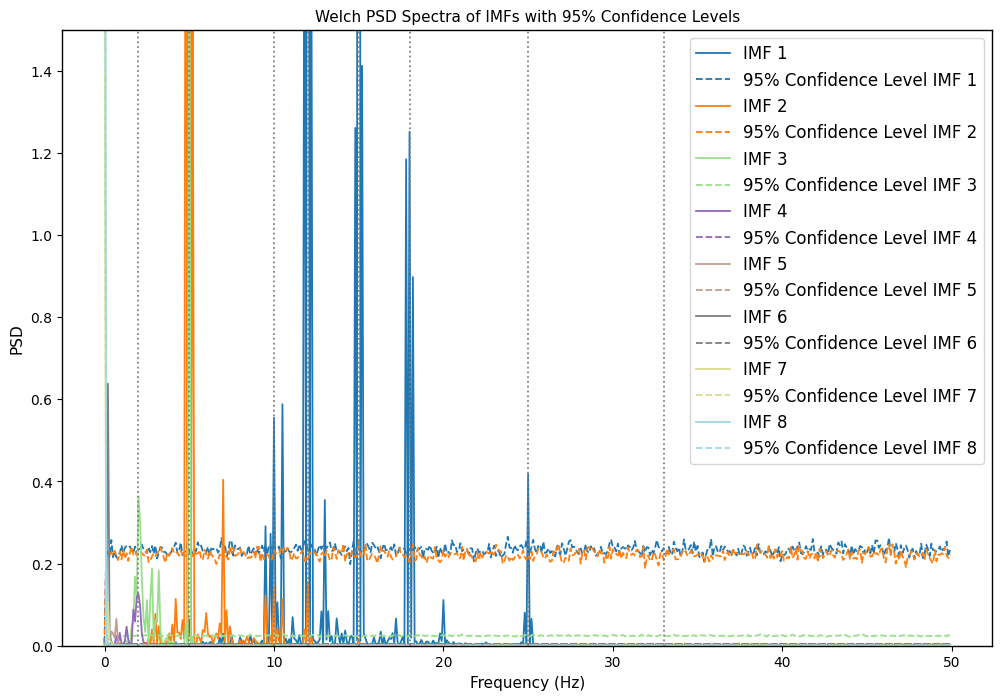

In [8]:
# Further tests 
# FFT Spectra of individual significant IMFs (i.e., excluding the non-significant IMFs) - using EEMD
_, _, _, psd_spectra_welch, confidence_levels_welch, _, _, _ = WaLSAtools(
    signal = signal, 
    time = time, 
    method = 'emd', 
    siglevel = 0.95,
    EEMD = True,
    significant_imfs = True
)

plt.figure(figsize=(12, 8))
colors = plt.cm.tab20(np.linspace(0, 1, len(psd_spectra_welch)))

for i, (f, psd) in enumerate(psd_spectra_welch):
    plt.plot(f, psd, color=colors[i], label=f'IMF {i + 1}')
    plt.plot(f, confidence_levels_welch[i], color=colors[i], linestyle='--', label=f'95% Confidence Level IMF {i + 1}')

# Mark pre-defined frequencies with vertical lines
pre_defined_freq = [2,5,10,12,15,18,25,33]
for freq in pre_defined_freq:
    plt.axvline(x=freq, color='gray', linestyle=':')

plt.xlabel('Frequency (Hz)')
plt.ylabel('PSD')
plt.title('Welch PSD Spectra of IMFs with 95% Confidence Levels')
plt.legend()
plt.ylim(0, 1.5)
plt.show()